In [6]:
import nf
from nf import Tensor
import nf.nn.modules as nn
import nf.nn.functional as F
import numpy as np
from nf.optimizer.sgd import SGD
import mnist
from time import time
import matplotlib.pyplot as plt

In [33]:
x_train, y_train, x_test, y_test = mnist.load()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


(28, 28) [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 2.8088154349439205 -0.42407389439156606


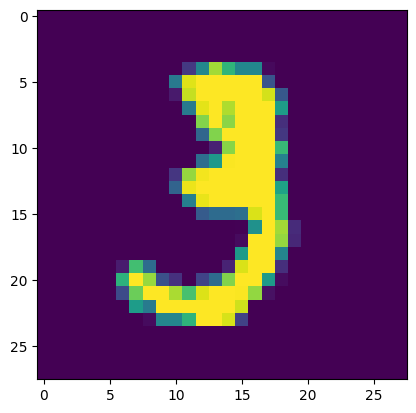

In [6]:
index = 10
x_train = (x_train - x_train.mean()) / x_train.std()
img = x_train[index].reshape([28, 28])
print(img.shape, y_train[index], img.max(), img.min())
plt.imshow(img)
plt.show()

In [2]:
class NfModel(nn.Module):
    def __init__(self):
        super(NfModel, self).__init__()
        self.fc1 = nn.Linear(IMAGE_SIZE * IMAGE_SIZE, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, CLASS_SIZE)

    def forward(self, x):
        if isinstance(x, np.ndarray):
            x = Tensor(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), -1)
        return x

In [4]:
BATCH_SIZE = 60
IMAGE_SIZE = 28
CLASS_SIZE = 10
x_train, y_train, x_test, y_test = mnist.load()
x_train = x_train.astype(float)
x_test = x_test.astype(float)
x_train = (x_train - x_train.mean()) / x_train.std()
x_test  = (x_test - x_test.mean()) / x_test.std()
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]
_, input_size = x_train.shape
_, output_size = y_train.shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_train.max(), x_test.max())

nfnet = NfModel()
nfopt = SGD(nfnet.parameters(), lr=1e-4, momentum=0.9,nesterov=True)

batch = Tensor(x_test)
gt = Tensor(y_test)
nfr = nfnet(batch).numpy()
nfr = np.argmax(nfr, axis=-1)
gt = np.argmax(gt.numpy(), axis=-1)
# print(nfr)
# print(gt)
acc = (nfr == gt).sum()
print(acc / nfr.shape[0])
epch = 10
circle = 999


def categorical_crossentropy(output, target, from_logits=False):
    output /= output.sum(axis=-1, keepdims=True)
    a = target * -nf.log(output)
    return nf.sum(a, axis=-1, keepdims=False)

for j in range(epch):
    # print()
    t1 = time()
    for i in range(circle):
        batch = Tensor(x_train[i*BATCH_SIZE:(i+1)*BATCH_SIZE])
        gt = Tensor(y_train[i*BATCH_SIZE:(i+1)*BATCH_SIZE])
        nfr = nfnet(batch)
        loss = categorical_crossentropy(nfr, gt)
        nfopt.zero_grad()
        loss.backward()
        nfopt.step()
    batch = Tensor(x_test)
    gt = Tensor(y_test)
    nfr = nfnet(batch).numpy()
    nfr = np.argmax(nfr, axis=-1)
    gt = np.argmax(gt.numpy(), axis=-1)
    acc = (nfr == gt).sum()
    print("epoch: ",j, time()-t1,"\t", acc / nfr.shape[0],'\t', loss.mean().numpy())





(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
2.821543345689335 2.794011535161325
0.1246
epoch:  0 4.479550123214722 	 0.9386 	 0.39684185615592654
epoch:  1 3.958462953567505 	 0.9608 	 0.3558915179607359
epoch:  2 4.519384860992432 	 0.9688 	 0.3469166264041693
epoch:  3 3.9217779636383057 	 0.9718 	 0.34241251095786035
epoch:  4 4.2663421630859375 	 0.9733 	 0.34321617550090977
epoch:  5 4.309385061264038 	 0.9747 	 0.34592803526557175
epoch:  6 4.189411878585815 	 0.9749 	 0.34545384733834433
epoch:  7 4.467384099960327 	 0.9755 	 0.3434791225129696
epoch:  8 4.093169927597046 	 0.977 	 0.3422063250239089
epoch:  9 3.9876842498779297 	 0.9767 	 0.33829047959566394


(330, 330) 4.03209028364766 -0.3623252409946681


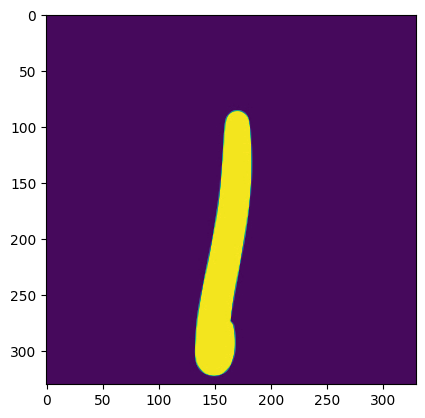

In [16]:
import cv2
test_img = cv2.imread("test.png")
s = [slice(0, 330), slice(360, 690), slice(750, 1080)]
test_img = test_img[200:530, s[0], 2]
# test_img = (test_img > 100) * 255.0
test_img = (test_img - test_img.mean())/test_img.std()
print(test_img.shape, test_img.max(), test_img.min())
plt.imshow(test_img);plt.show()

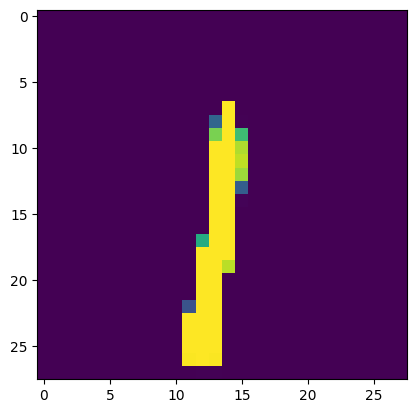

(784,)
1


In [17]:
test_img = cv2.resize(test_img, [28,28])
plt.imshow(test_img);plt.show()
input_img=Tensor(test_img.reshape([784]))
print(input_img.shape)
nfr = nfnet(input_img).numpy()
nfr = np.argmax(nfr, axis=-1)
print(nfr)

(28, 28) [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 2.821543345689336 -0.4240738943915661


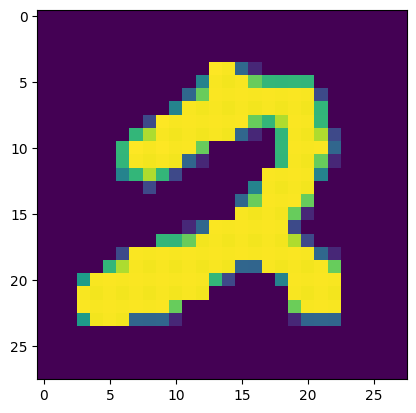

(784,)
2


In [13]:
index = 11997
x_train = (x_train - x_train.mean()) / x_train.std()
img = x_train[index].reshape([28, 28])
print(img.shape, y_train[index], img.max(), img.min())
plt.imshow(img)
plt.show()
input_img=Tensor(img.reshape([784]))
print(input_img.shape)
nfr = nfnet(input_img).numpy()
nfr = np.argmax(nfr, axis=-1)
print(nfr)